In [1]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
import matplotlib.pyplot as plt

In [5]:
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

In [6]:
single_image = x_train[0]

In [8]:
single_image.shape

(28, 28)

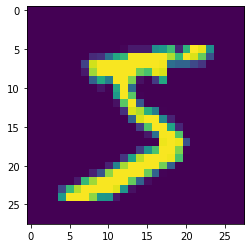

In [11]:
plt.imshow(single_image)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
from keras.utils.np_utils import to_categorical

In [17]:
# translate to be "one hot encoded" so our CNN can understand
y_cat_train = to_categorical(y_train, 10)

In [18]:
y_cat_test = to_categorical(y_test, 10)

In [20]:
y_train.shape

(60000,)

In [21]:
y_cat_train.shape

(60000, 10)

In [22]:
x_train = x_train/255
x_test = x_test/255

In [24]:
x_train = x_train.reshape(60000, 28, 28, 1) # Reshape to include channel dimension

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation="relu"))

# Pooling Lyaer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten images from 28x28 to 764 before the final layer
model.add(Flatten())

# 128 neurons in dense hidden layer
model.add(Dense(128, activation='relu'))

# Classifier, 10 possible classes
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [33]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1410 - accuracy: 0.9560
Epoch 2/2
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0466 - accuracy: 0.9858


In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0352 - accuracy: 0.9872


[0.03524913266301155, 0.9872000217437744]

In [36]:
from sklearn.metrics import classification_report

In [38]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [39]:
predictions[0]

array([3.5696694e-09, 4.1756039e-09, 9.1300741e-08, 1.9299227e-07,
       3.7779203e-11, 2.9313229e-12, 5.5217129e-15, 9.9999756e-01,
       1.8916770e-08, 1.9623919e-06], dtype=float32)

In [46]:
import numpy as np

predictions=np.argmax(predictions,axis=1)
predictions[0]

7

In [45]:
y_test[0]

7

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

